# <hi><u> Wine Quality Prediction: A Machine Learning Techiniqes</u></h1>

## Name:Anakha A Pillai 


## Oganization:Entri Elevate 

## Date:

## Project Overview:
                    This project focuses on using machine learning to predict the quality of wine based on its chemical properties, such as alcohol content, acidity, and pH levels. The goal is to create a model that can accurately predict wine quality, helping winemakers improve production. The project will explore different machine learning models to find the best one for predicting wine quality.


## Objective:
             The objective is to develop a machine learning model that can predict wine quality based on its chemical properties, helping producers assess and improve their wine.


## Data Description:

## Source:

The Wine Quality Dataset is available from the UCI Machine Learning Repository:
Wine Quality Dataset


## Features:

The dataset contains the following features:

1. Fixed Acidity – Amount of fixed acids in the wine.


2. Volatile Acidity – Amount of volatile acids in the wine.


3. Citric Acid – Amount of citric acid in the wine.


4. Residual Sugar – Amount of sugar remaining after fermentation.


5. Chlorides – Salt content in the wine.


6. Free Sulfur Dioxide – Amount of free sulfur dioxide in the wine.


7. Total Sulfur Dioxide – Total amount of sulfur dioxide in the wine.


8. Density – Density of the wine.


9. pH – pH level of the wine.


10. Sulphates – Amount of sulphates in the wine.


11. Alcohol – Alcohol content in the wine.


12. Quality – The target variable, which represents the quality of the wine (on a scale from 0 to 10).



# Import Libraries


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load dataset

In [76]:
#load the redwine dataset
df_red =pd.read_csv('winequality-red.csv',delimiter=';')


In [77]:
print(df_red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [78]:
#load the whitewine dataset
df_white =pd.read_csv('winequality-white.csv',delimiter=';')


In [79]:
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

### Combining the Two Datasets

In [81]:
data= pd. concat([df_red,df_white],ignore_index=True)
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [82]:
#CONFIRMING THE COMBINED DataFrame
print(f"shape of combined DataFrame:{data.shape}")

shape of combined DataFrame:(6497, 12)


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [84]:
#finding null value
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [85]:
# Finding duplicate
data.duplicated().sum()

1179

In [86]:
#Remove duplicate row
data=data.drop_duplicates()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [87]:
# Display the shape of cleaned DataFram
print(f"Shape after removing duplicates:{data.shape}")

Shape after removing duplicates:(5318, 12)


In [88]:
print(f"sum of duplicates:{data.duplicated().sum()}")

sum of duplicates:0


In [89]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


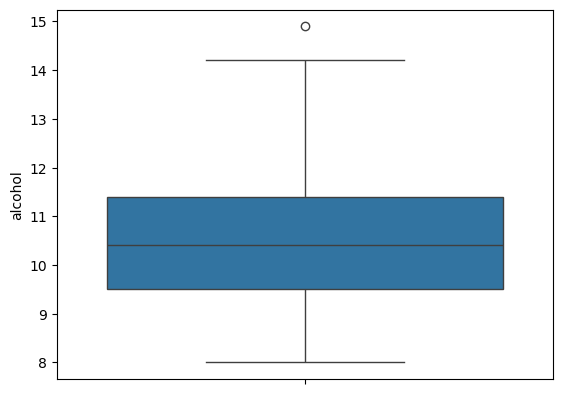

In [90]:
#check the remove outlies
sns.boxplot(data['alcohol'])
plt.show()

In [91]:
df = pd.DataFrame(data)

In [92]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [93]:
numeric_columns = df.select_dtypes(include=['number'])

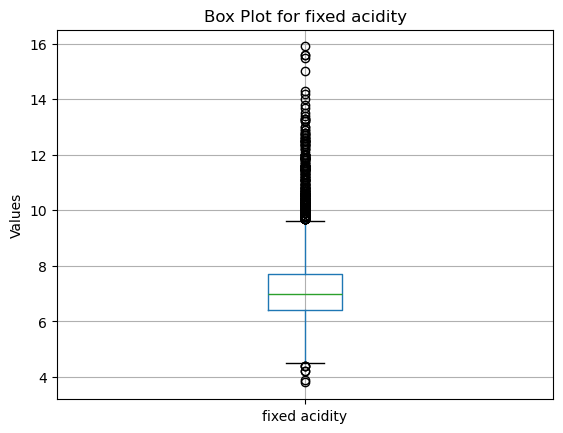

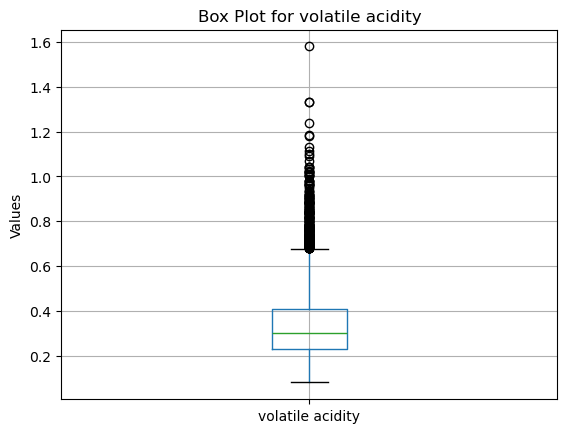

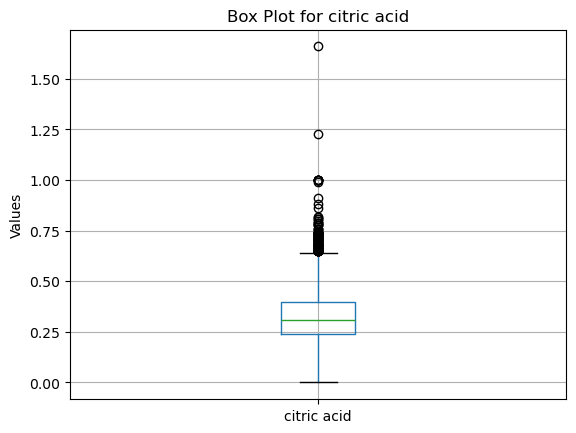

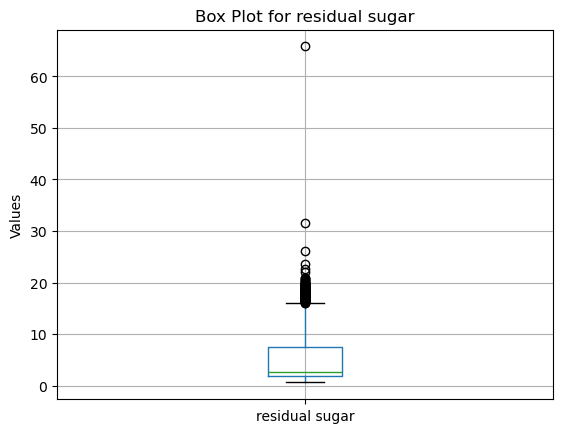

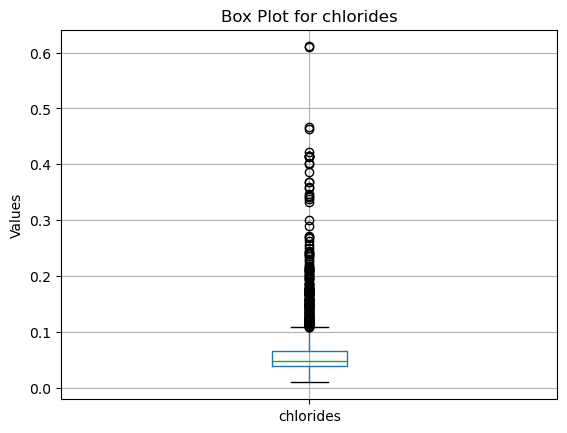

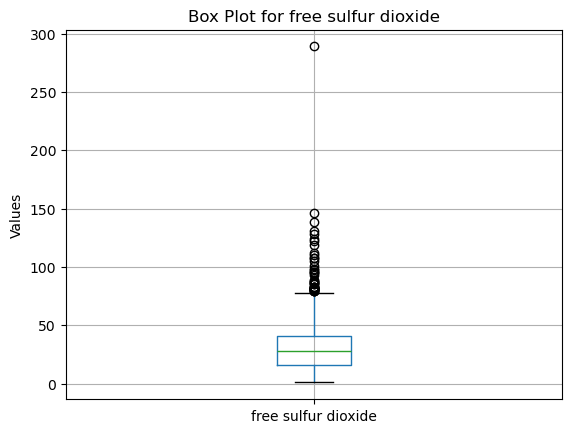

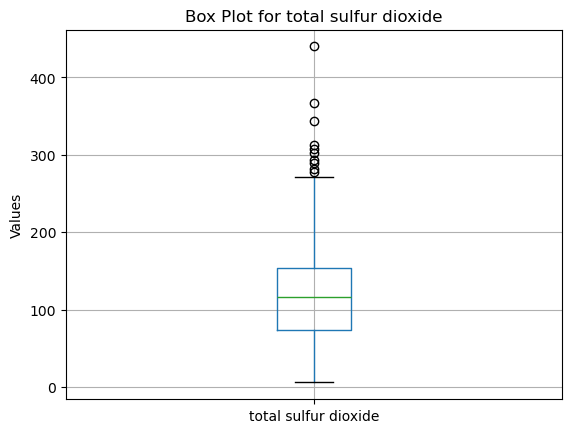

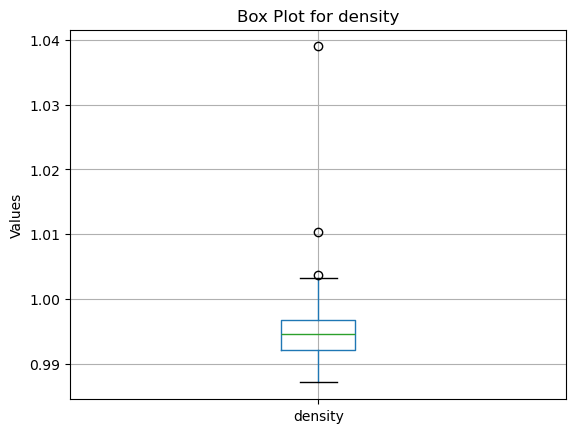

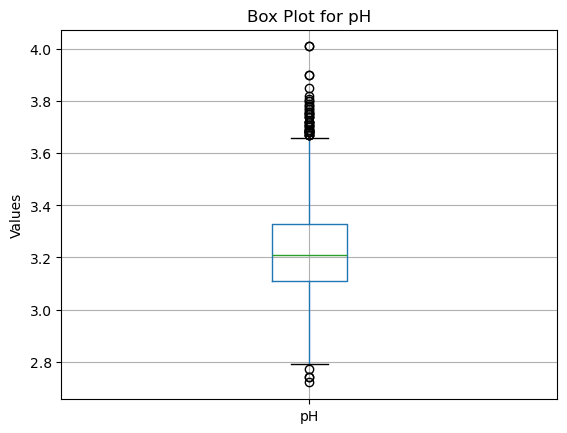

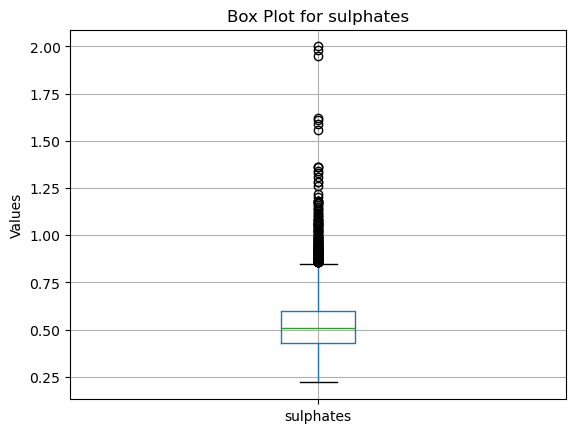

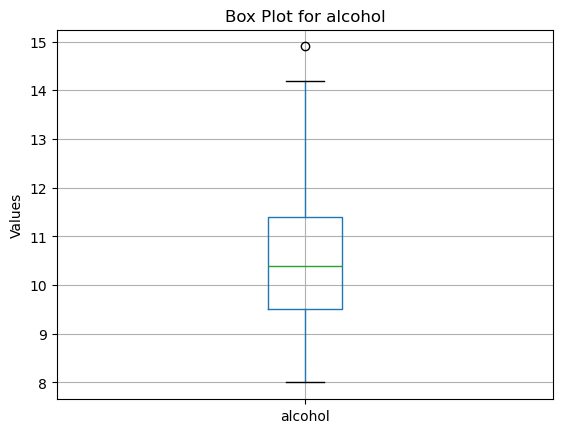

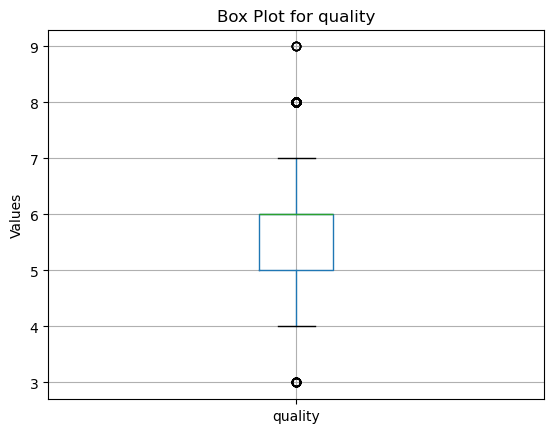

In [94]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.boxplot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

In [95]:
#Remove outliers using statistical methods like IQR
#IQR (forloop)
for column in numeric_columns.columns:
    Q1 = df['alcohol'].quantile(0.25)  # 25th percentile
    Q3 = df['alcohol'].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [96]:
# Replace outliers with boundaries
df['alcohol'] = np.where(
        df['alcohol'] < lower_bound, lower_bound,
        np.where(df[column] > upper_bound, upper_bound, df[column])
    )

print("Fixed DataFrame:")
print(df)

Fixed DataFrame:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free

## visualize data distribution

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

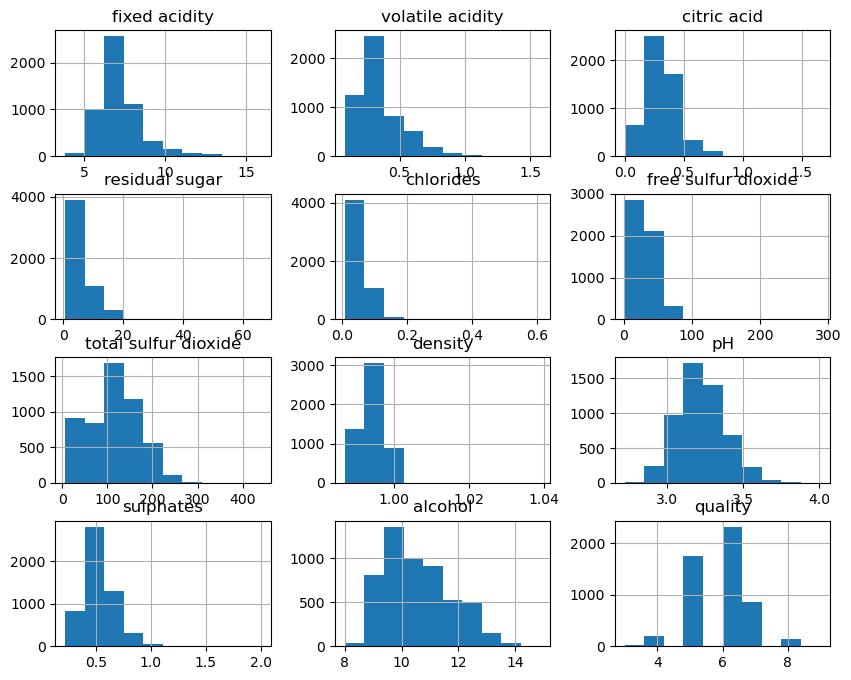

In [98]:
#histrograms
data.hist(figsize=(10,8))

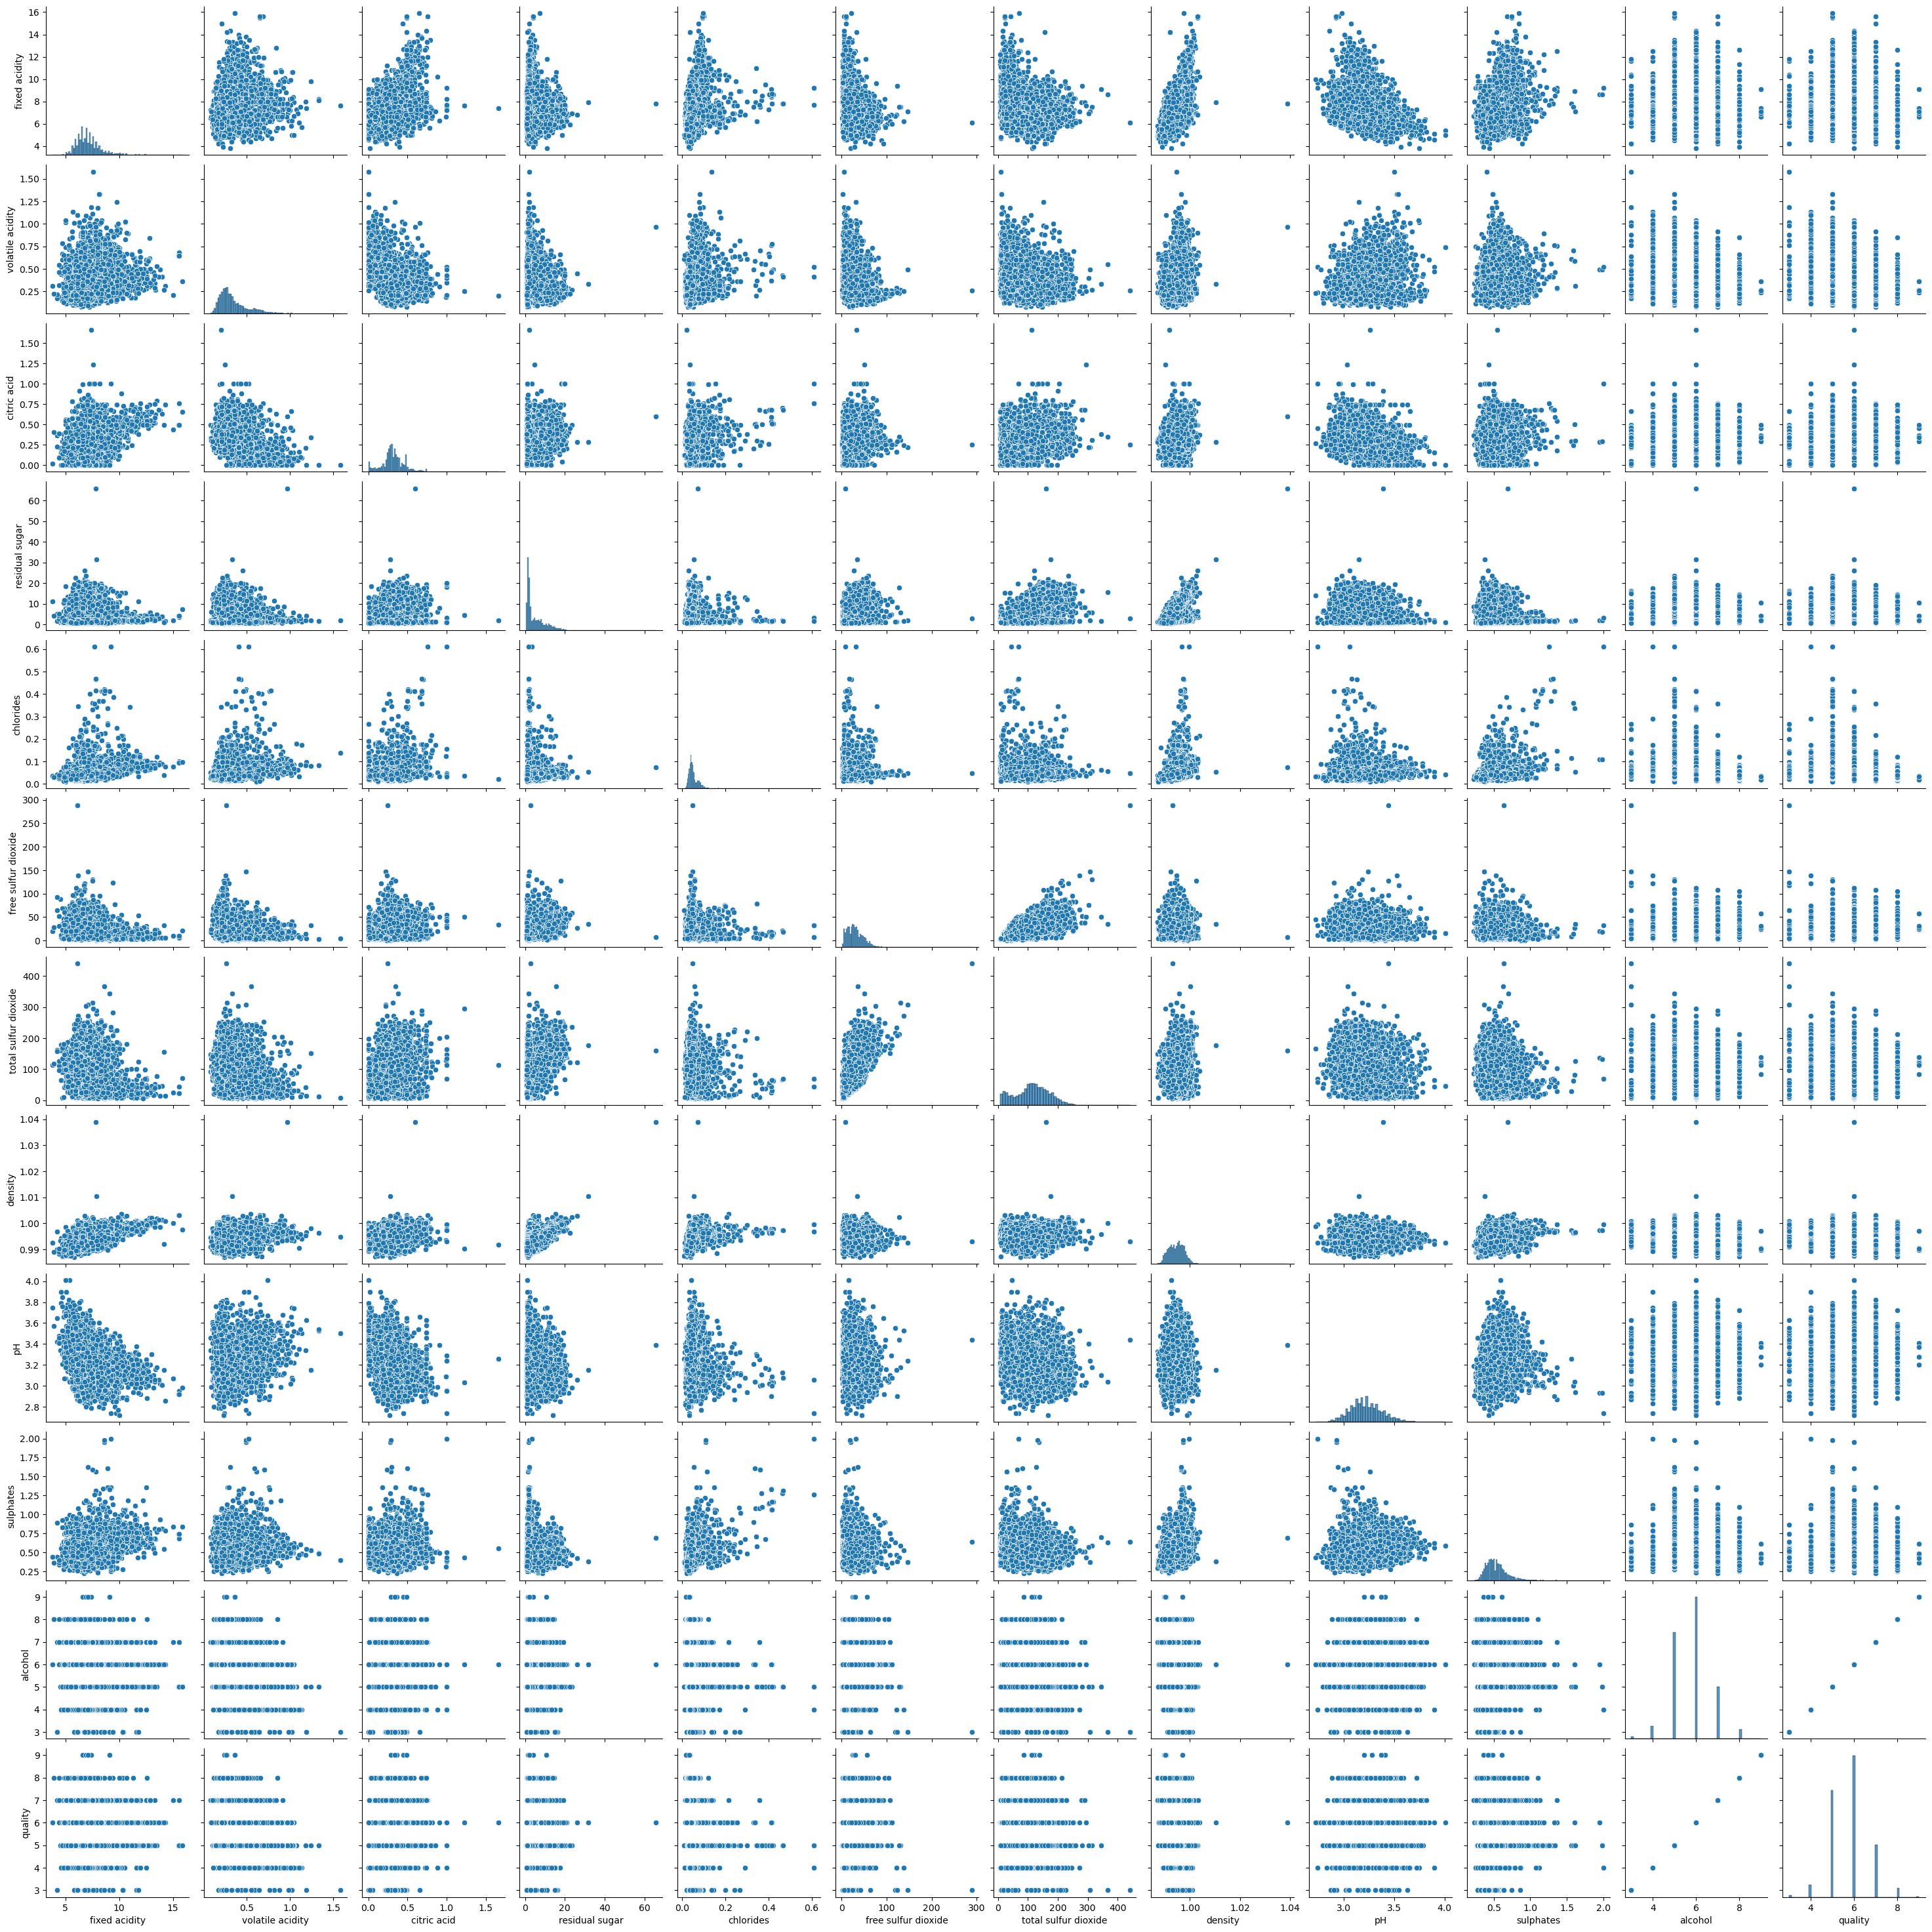

In [99]:
# Pairplot

sns.pairplot(df)

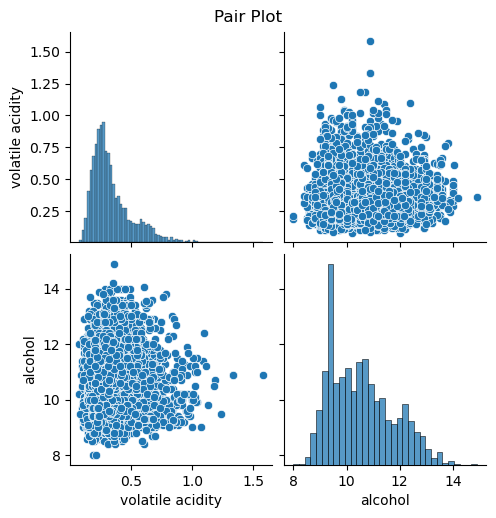

In [100]:
sns.pairplot(data[['volatile acidity','alcohol']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()



<Axes: ylabel='Density'>

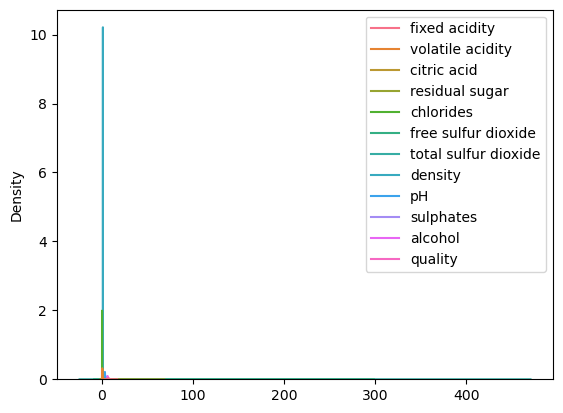

In [116]:
sns.kdeplot(df)

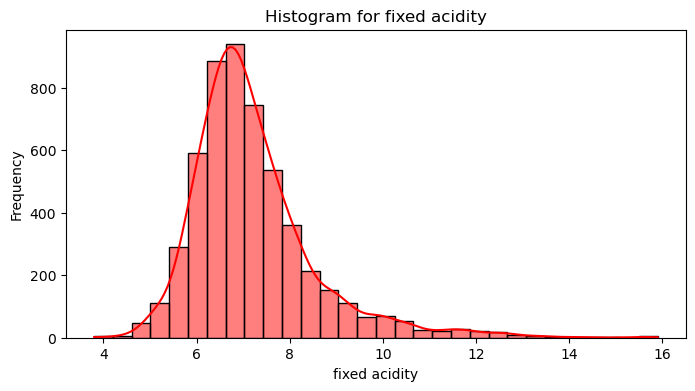

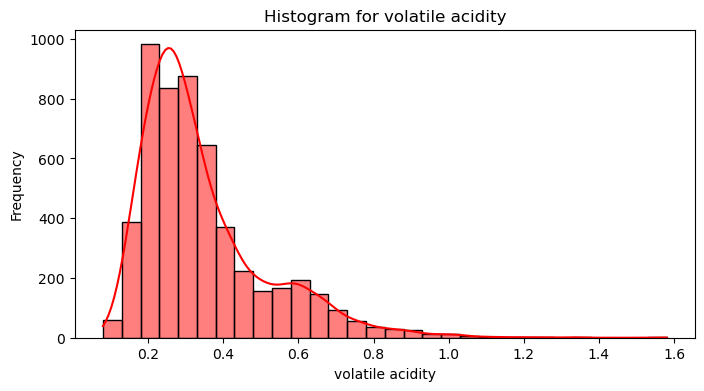

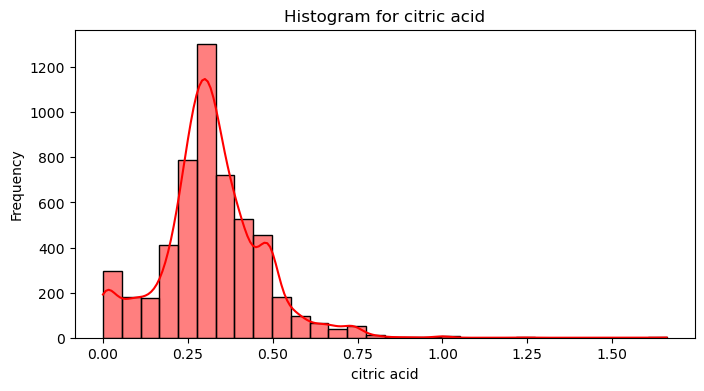

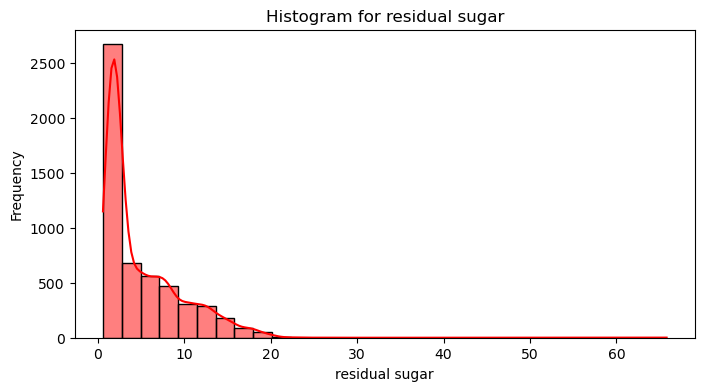

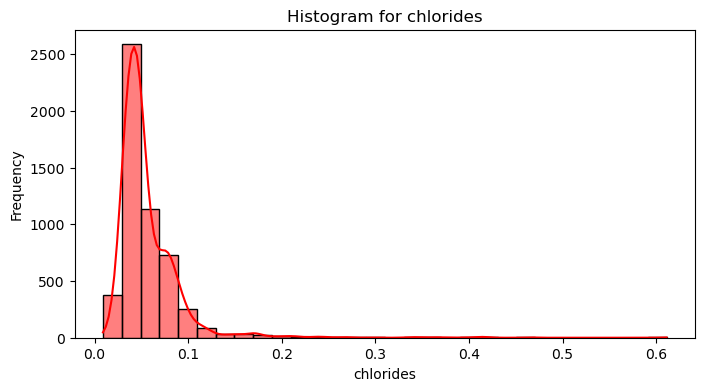

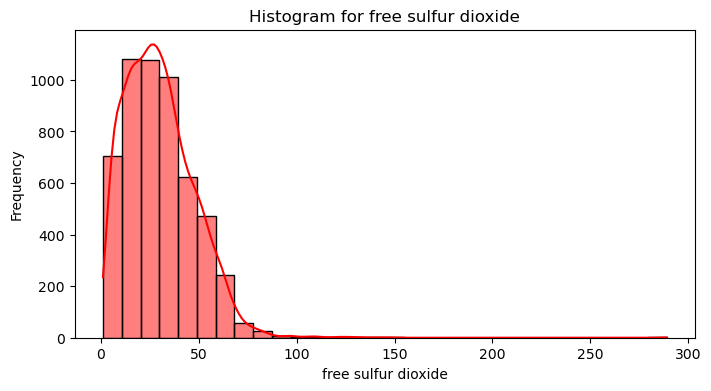

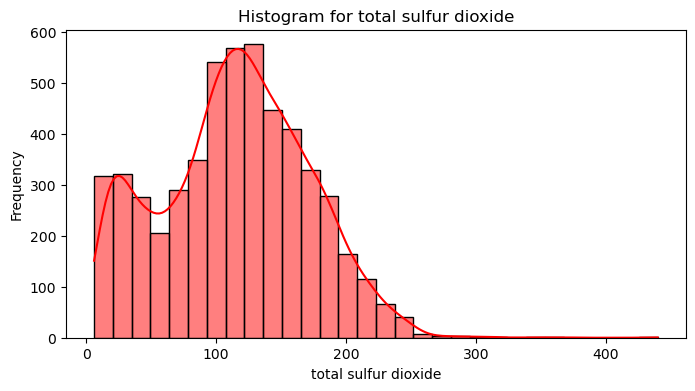

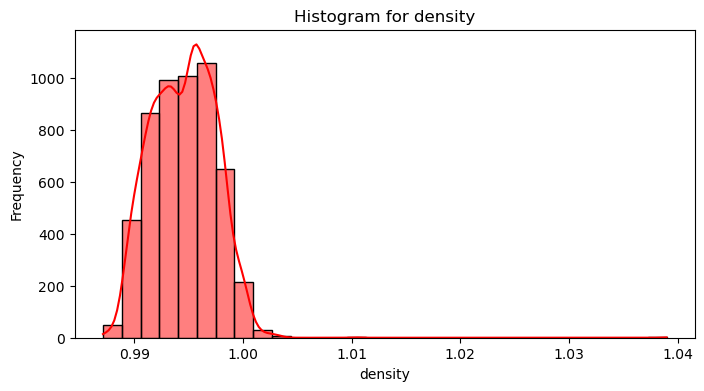

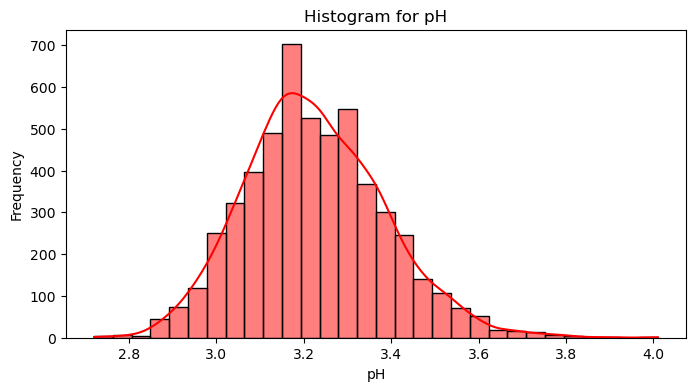

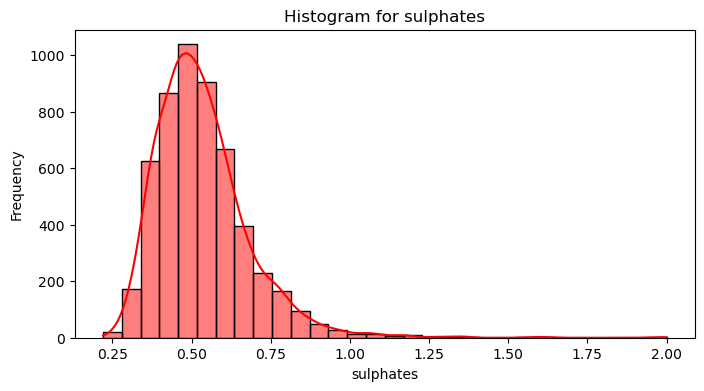

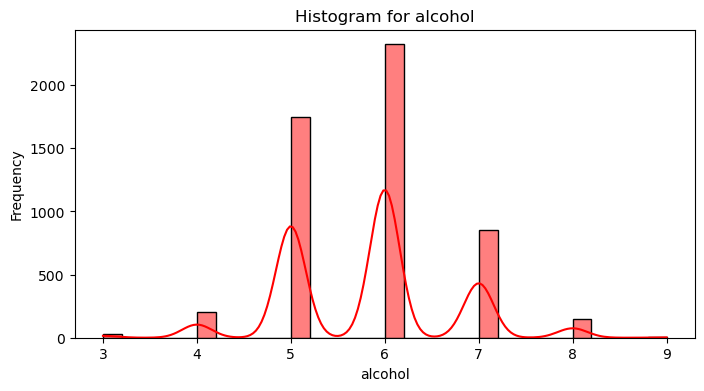

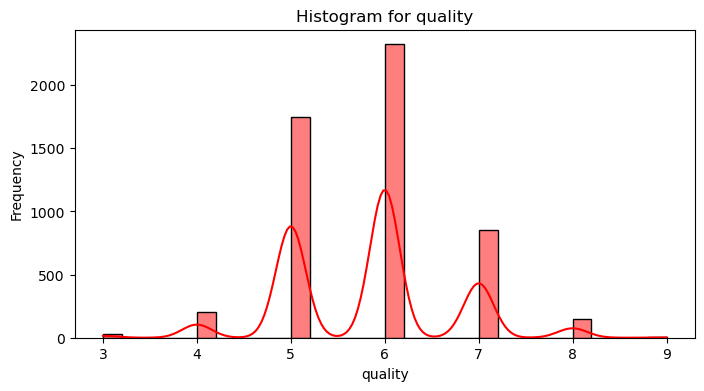

In [132]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=df, x=column, kde=True, bins=30,color='red')  # Histogram with KDE
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

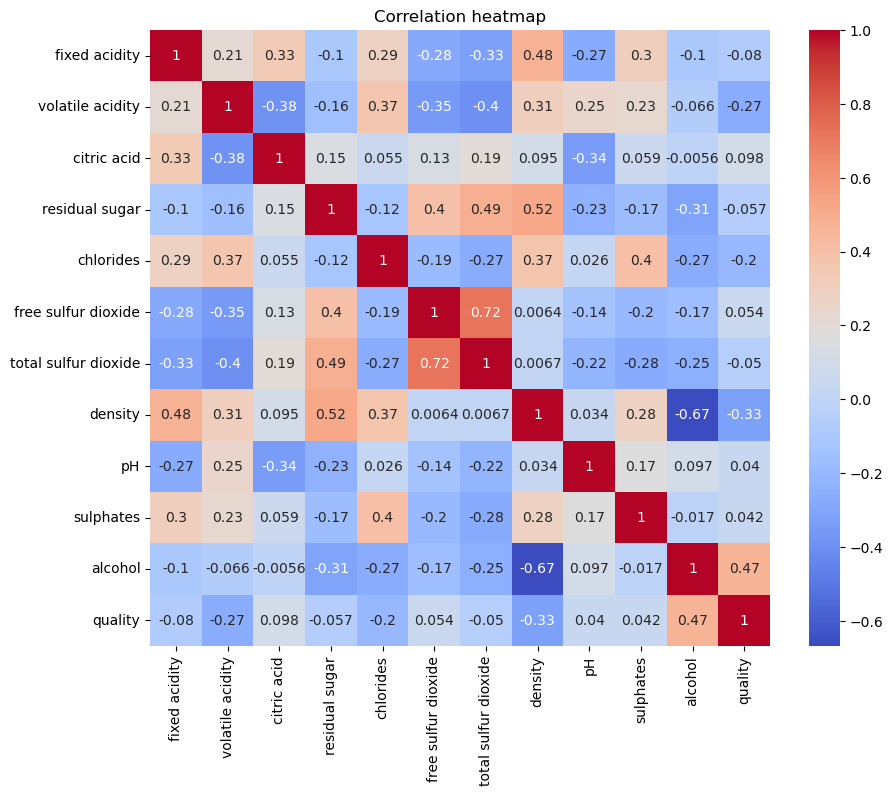

In [134]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [ ]:
#check  class distribution
print (data["quality"].value_counts())

## FRATURE SELECTION 


In [172]:
#split data into fratures and target
X= data.drop('quality', axis=1)
y= data['quality']
#spilit into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [174]:
#FRATURE SELECTION USING RAMDOMFOREST
rf = RandomForestClassifier(n_estimators=100,random_state=45,max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=45)

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [168]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                 Feature  Importance
10               alcohol    0.353670
1       volatile acidity    0.140549
7                density    0.118609
4              chlorides    0.094590
2            citric acid    0.052753
9              sulphates    0.050138
5    free sulfur dioxide    0.048188
6   total sulfur dioxide    0.044394
3         residual sugar    0.041580
8                     pH    0.032615
0          fixed acidity    0.022911


In [164]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [166]:
X_train_selected

array([[ 5.4  ,  0.22 ,  0.29 , ...,  3.76 ,  0.63 , 11.   ],
       [10.2  ,  0.29 ,  0.49 , ...,  3.05 ,  0.74 , 10.5  ],
       [ 6.6  ,  0.705,  0.07 , ...,  3.44 ,  0.58 , 10.7  ],
       ...,
       [ 5.5  ,  0.16 ,  0.26 , ...,  3.43 ,  0.77 , 12.   ],
       [ 5.7  ,  0.33 ,  0.32 , ...,  3.31 ,  0.5  , 12.3  ],
       [ 8.9  ,  0.32 ,  0.31 , ...,  3.17 ,  0.55 , 10.4  ]])